In [3]:
import pandas as pd
import plotly.express as px
import numpy as np

In [73]:
ss = pd.read_csv("C:/Users/Jerem/Documents/NU SPRING 2025/DS4200 INFO PRES/PROJECT/DS4200/CSV_FILE/Superstore.csv",
                encoding="ISO-8859-1")

state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

ss['Code'] = ss['State'].map(state_abbreviations)

profit_per_state = ss.groupby('Code')['Profit'].sum().reset_index()
sales_per_state = ss.groupby('Code')['Sales'].sum().reset_index()

category_sales = ss.groupby(['Code', 'Category'])['Sales'].sum().reset_index()
best_category_per_state = category_sales.loc[category_sales.groupby('Code')['Sales'].idxmax()]
best_category_per_state.rename(columns={'Category': 'Best_Selling_Category', 'Sales': 'Best_Selling_Sales'}, inplace=True)

ss.rename(columns={'Profit': 'Total_Profit', 'Sales': 'Total_Sales'}, inplace=True)


ss = pd.merge(ss, profit_per_state, left_on='Code', right_on='Code', how='outer')
ss = pd.merge(ss, sales_per_state, left_on='Code', right_on='Code', how='outer')
ss = pd.merge(ss, best_category_per_state, left_on='Code', right_on='Code', how='outer')

ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Total_Sales,Quantity,Discount,Total_Profit,Code,Profit,Sales,Best_Selling_Category,Best_Selling_Sales
0,80,CA-2016-127208,6/12/2016,6/15/2016,First Class,SC-20770,Stewart Carmichael,Corporate,United States,Decatur,...,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",208.16,1,0.0,56.2032,AL,5786.8253,19510.64,Technology,8969.08
1,81,CA-2016-127208,6/12/2016,6/15/2016,First Class,SC-20770,Stewart Carmichael,Corporate,United States,Decatur,...,Avery Heavy-Duty EZD Binder With Locking Rings,16.74,3,0.0,8.0352,AL,5786.8253,19510.64,Technology,8969.08
2,534,CA-2016-168753,5/29/2016,6/1/2016,Second Class,RL-19615,Rob Lucas,Consumer,United States,Montgomery,...,Panasonic KX-TG9471B,979.95,5,0.0,274.3860,AL,5786.8253,19510.64,Technology,8969.08
3,535,CA-2016-168753,5/29/2016,6/1/2016,Second Class,RL-19615,Rob Lucas,Consumer,United States,Montgomery,...,Presstex Flexible Ring Binders,22.75,5,0.0,11.3750,AL,5786.8253,19510.64,Technology,8969.08
4,1270,CA-2017-100426,6/4/2017,6/8/2017,Standard Class,DC-12850,Dan Campbell,Consumer,United States,Florence,...,"Ampad Phone Message Book, Recycled, 400 Messag...",12.48,2,0.0,5.6160,AL,5786.8253,19510.64,Technology,8969.08


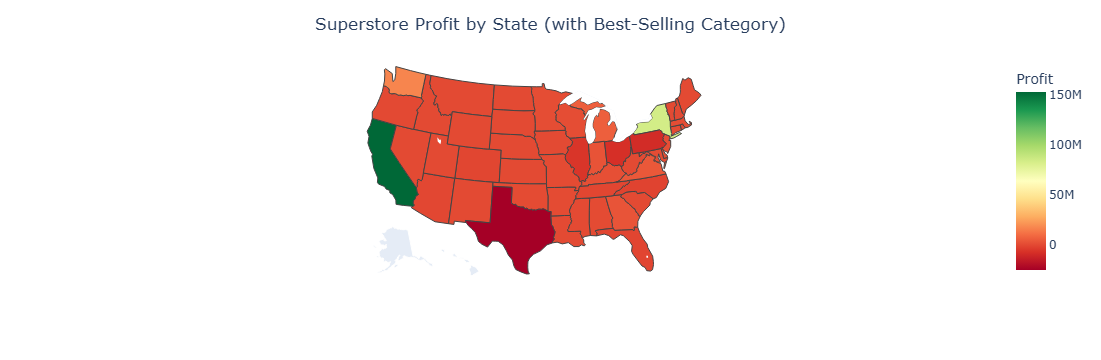

In [147]:
import pandas as pd
import numpy as np
import plotly.express as px

# Aggregate total profit and sales by state
ss_agg = ss.groupby(["State", "Code"]).agg(
    {"Profit": "sum", "Sales": "sum"}
).reset_index()

# Find the most popular category for each state
best_category = ss.groupby(["State", "Category"])["Sales"].sum().reset_index()
best_category = best_category.loc[best_category.groupby("State")["Sales"].idxmax()]
best_category = best_category[["State", "Category"]].rename(columns={"Category": "Best_Selling_Category"})

# Merge with aggregated state-level data
ss_agg = ss_agg.merge(best_category, on="State", how="left")

# Create choropleth with best-selling category in hover
m_profit = px.choropleth(
    ss_agg,
    locations="Code",
    locationmode="USA-states",
    color="Profit",
    scope="usa",
    hover_name="State",
    hover_data=["Sales", "Best_Selling_Category"],  # Added best-selling category
    color_continuous_scale="rdylgn",
    range_color=[ss_agg["Profit"].min(), ss_agg["Profit"].max()]
)

m_profit.update_layout(
    title_text="Superstore Profit by State (with Best-Selling Category)",
    title_x=0.5
)

m_profit.show()


In [149]:
m_profit.write_html('m_profit.html')

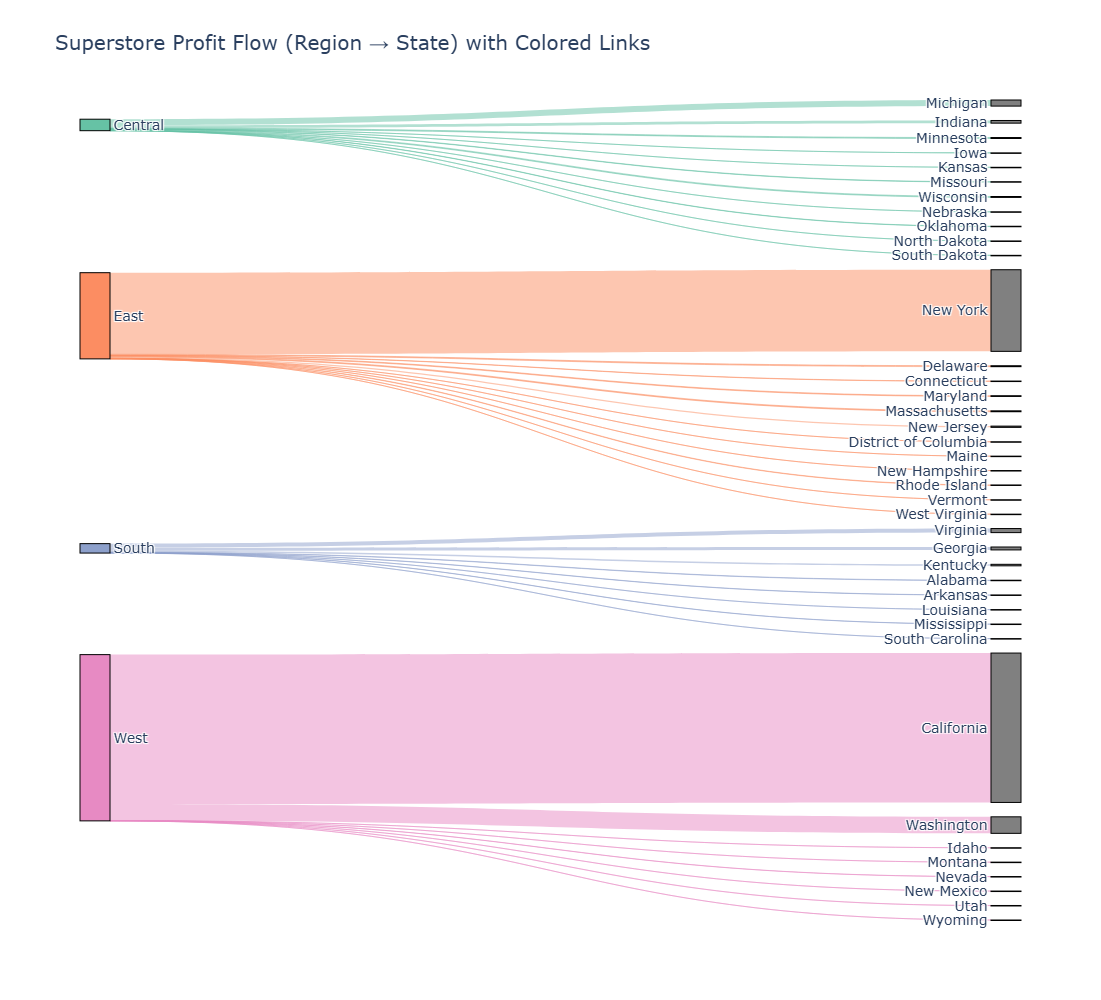

In [105]:
import pandas as pd
import plotly.graph_objects as go
import plotly.colors as pc



# Group by Region → State and sum the Profit
grouped = ss.groupby(["Region", "State"])["Profit"].sum().reset_index()

# Get unique regions and states
unique_regions = grouped["Region"].unique()

# Assign distinct colors to each region
region_colors = pc.qualitative.Set2[:len(unique_regions)]  # Pick distinct colors
region_color_dict = {region: region_colors[i] for i, region in enumerate(unique_regions)}

# Create label mappings
all_labels = pd.concat([grouped["Region"], grouped["State"]]).unique()
label_dict = {label: i for i, label in enumerate(all_labels)}

# Map labels to indices
grouped["region_idx"] = grouped["Region"].map(label_dict)
grouped["state_idx"] = grouped["State"].map(label_dict)

# Convert RGB colors to RGBA with transparency for links
def rgb_to_rgba(rgb_str, alpha=0.5):
    rgb_values = rgb_str[rgb_str.find("(")+1:rgb_str.find(")")].split(",")  # Extract numbers
    return f"rgba({rgb_values[0]},{rgb_values[1]},{rgb_values[2]},{alpha})"

# Assign node colors
node_colors = [region_color_dict.get(label, "gray") for label in label_dict.keys()]

# Assign link colors (RGBA versions of region colors)
link_colors = [rgb_to_rgba(region_color_dict[region], alpha=0.5) for region in grouped["Region"]]

# Create Sankey diagram with colored links
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=1),
        label=list(label_dict.keys()),
        color=node_colors  # Assigning node colors
    ),
    link=dict(
        source=grouped["region_idx"].tolist(),
        target=grouped["state_idx"].tolist(),
        value=grouped["Profit"].tolist(),
        color=link_colors,  # Assigning fixed link colors
        customdata=grouped[["Region", "State", "Profit"]].values,
        hovertemplate=(
            "Region: %{customdata[0]}<br>"
            "State: %{customdata[1]}<br>"
            "Profit: $%{customdata[2]:,.2f}<extra></extra>"
        )
    )
)])

# Update layout for better visibility
fig.update_layout(
    title_text="Superstore Profit Flow (Region → State) with Colored Links",
    font_size=14,
    width=1000,
    height=1000,
)

fig.show()
